ID: Veri kümesindeki her bir birey için benzersiz tanımlayıcı.

Year_Birth: Bireyin doğum yılı.

Education: Bireyin ulaştığı en yüksek eğitim düzeyidir.

Marital_Status: Bireyin medeni durumu.

Income: Bireyin yıllık geliridir.

Kidhome: Hanedeki küçük çocuk sayısı.

Teenhome: Hanedeki gençlerin sayısı.

Dt_Customer: Müşterinin ilk kayıt olduğu veya şirket veri tabanına dahil olduğu tarih.

Recency: Son satın alma veya etkileşimden bu yana geçen gün sayısı.

MntWines: Şaraplara harcanan miktar.

MntFruits: Meyvelere harcanan tutar.

MntMeatProducts: Et ürünlerine harcanan tutar.

MntFishProducts: Balık ürünlerine harcanan tutar.

MntSweetProducts: Tatlı ürünlere harcanan tutar.

MntGoldProds: Altın ürünlerine harcanan tutar.

NumDealsPurchases: İndirimli veya bir fırsat kapsamında yapılan satın almaların sayısı.

NumWebPurchases: Şirketin web sitesi üzerinden yapılan satın alma sayısı.

NumCatalogPurchases: Kataloglar aracılığıyla yapılan satın almaların sayısı.

NumStorePurchases: Fiziksel mağazalarda yapılan satın alma sayısı.

NumWebVisitsMonth: Şirketin web sitesine bir ay içinde yapılan ziyaretlerin sayısı.

AcceptedCmp3: Bireyin üçüncü pazarlama kampanyasını kabul edip etmediğini gösteren ikili gösterge (1 veya 0).

AcceptedCmp4: Bireyin dördüncü pazarlama kampanyasını kabul edip etmediğinin ikili göstergesi (1 veya 0).

AcceptedCmp5: Bireyin beşinci pazarlama kampanyasını kabul edip etmediğinin ikili göstergesi (1 veya 0).

AcceptedCmp1: Bireyin ilk pazarlama kampanyasını kabul edip etmediğinin ikili göstergesi (1 veya 0).

AcceptedCmp2: Bireyin ikinci pazarlama kampanyasını kabul edip etmediğinin ikili göstergesi (1 veya 0).

Complain: Bireyin şikayette bulunup bulunmadığına dair ikili gösterge (1 veya 0).

Z_CostContact: Bir müşteriyle iletişim kurmayla ilişkili sabit maliyet.

Z_Revenue: Başarılı bir kampanya yanıtıyla ilişkilendirilen sabit gelir.

Response: Bireyin pazarlama kampanyasına yanıt verip vermediği ikili gösterge (1 veya 0).

In [68]:
# Bu projede;RFM Değerlerini bulacağım ve bu değerler üzerinden K-Means Clustering algoritmasını kullanarak kümeleme işlemleri yapacağım.

# RFM; Recency, Frequency, Monetary ifadelerinin ilk harflarinden oluşur. Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

# Recency: müşteri en son ne zaman ürün satın almış

# Frequency: müşteri toplam kaç adet ürün almış

# Monetary: Müşteri toplam ne kadar harcama yapmış


# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('customer_segmentation.csv', delimiter=",")
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
dataset.shape

(2240, 29)

In [4]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
dataset["Income"].fillna(dataset["Income"].mean(),inplace=True)
dataset.isnull().sum().sum()

0

In [7]:
# toplam ne kadar harcama yapılmış bu sutunu da ekleyeceğim

# Toplam harcamayı hesapla
dataset['TotalSpent'] = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422


In [76]:
dataset[['ID', 'TotalSpent']].sort_values(by="TotalSpent",ascending=False).head()
                                             

,ID,TotalSpent
1572,5350,2525
1179,5735,2525
1492,1763,2524
987,4580,2486
1052,4475,2440


In [77]:
# Toplam alışveriş sayısını hesapla
dataset['TotalPurchases'] = dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
dataset[['ID', 'TotalPurchases']].sort_values(by="TotalPurchases",ascending=False).head()

,ID,TotalPurchases
687,1501,44
21,5376,43
432,238,39
164,8475,37
412,7030,35


In [78]:
dataset.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,21


In [79]:
df = dataset[["ID","TotalSpent","TotalPurchases","Recency"]]
df.head()

,ID,TotalSpent,TotalPurchases,Recency
0,5524,1617,25,58
1,2174,27,6,38
2,4141,776,21,26
3,6182,53,8,26
4,5324,422,19,94


In [80]:
df.rename(columns={"TotalSpent":"Monetary","TotalPurchases":"Frequency"},inplace=True)
df.head(3)

,ID,Monetary,Frequency,Recency
0,5524,1617,25,58
1,2174,27,6,38
2,4141,776,21,26


In [81]:
from sklearn.preprocessing import  MinMaxScaler

df_scaled = df.copy()
for i in ["Monetary","Recency","Frequency"]:
    mms = MinMaxScaler()
    df_scaled[i] = mms.fit_transform(df_scaled[[i]])
df_scaled.head()

,ID,Monetary,Frequency,Recency
0,5524,0.639683,0.568182,0.585859
1,2174,0.008730,0.136364,0.383838
2,4141,0.305952,0.477273,0.262626
3,6182,0.019048,0.181818,0.262626
4,5324,0.165476,0.431818,0.949495


In [82]:
X = df_scaled.iloc[:, 1:].values

# k değerinin bulunması

## 1 - **Elbow** Yöntemi

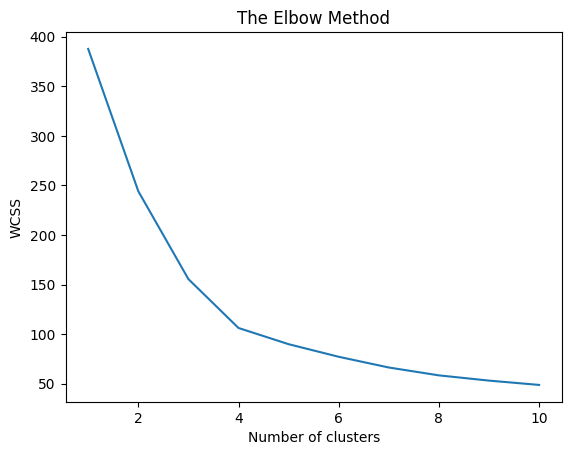

In [83]:
from sklearn.cluster import KMeans

# Kırılma noktasına göre "k" seçimi yapılır

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2 -**Silhouette Score** 

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette skorunun en büyük olduğu değeri "k" noktası olarak seçilebilir, çünkü bu noktada kümeleme performansı en yüksektir.
# Farklı küme sayıları için Silhouette Score'u hesapla
for n_clusters in range(2, 10):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Küme Sayısı = {n_clusters}, Silhouette Score = {silhouette_avg}")

Küme Sayısı = 2, Silhouette Score = 0.3463284758687573


Küme Sayısı = 3, Silhouette Score = 0.3808493959074128
Küme Sayısı = 4, Silhouette Score = 0.40344379025821103
Küme Sayısı = 5, Silhouette Score = 0.37198284037487445
Küme Sayısı = 6, Silhouette Score = 0.3650012224238235
Küme Sayısı = 7, Silhouette Score = 0.36609927167714856
Küme Sayısı = 8, Silhouette Score = 0.3640358957789426
Küme Sayısı = 9, Silhouette Score = 0.3689347388174327


In [85]:
# K-Means Clustering

kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init=10)
y_pred = kmeans.fit_predict(X)

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)
grid_search.fit(X)
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'algorithm': 'elkan', 'max_iter': 100, 'n_init': 5, 'random_state': 42, 'tol': 0.01}
En iyi skor: -21.35502232715752


In [86]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init=5,max_iter=100,algorithm='elkan',random_state=42,tol=0.01)
y_pred = kmeans.fit_predict(X)

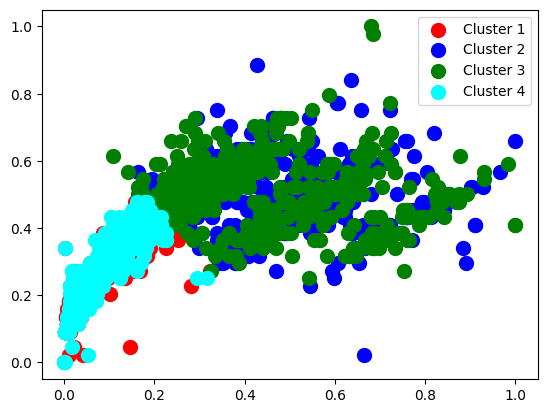

In [87]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.legend()
plt.show()

In [88]:
df["Cluster"] = y_pred
df.head()

,ID,Monetary,Frequency,Recency,Cluster
0,5524,1617,25,58,1
1,2174,27,6,38,0
2,4141,776,21,26,2
3,6182,53,8,26,0
4,5324,422,19,94,3


In [89]:
df.set_index('ID', inplace=True)
df.head(3)

,Monetary,Frequency,Recency,Cluster
ID,,,,
5524,1617,25,58,1
2174,27,6,38,0
4141,776,21,26,2


In [90]:
df.groupby("Cluster").mean()

,Monetary,Frequency,Recency
Cluster,,,
0,152.111283,9.293663,24.159196
1,1202.748000,21.656000,73.538000
2,1184.676533,22.226216,23.955603
3,156.203226,9.575806,74.635484


In [ ]:
# kümelere göre gruplama yapıp RFM değerlerinin ortalamasına bakıldığı zaman;
# en çok harcama yapan: Cluster = 1
# en sık ürün satın alan: Cluster = 2
# en çok ürün satın alan: Cluster = 2